## 1) Install and import needed libraries

In [1]:
!pip install deepxde  matplotlib  tensorflow scipy pandas 

import os
# Set backend
os.environ["DDE_BACKEND"] = "tensorflow" # Tells deepxde which ML library to use as backend
import tensorflow as tf
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import RegularGridInterpolator
from deepxde.callbacks import Callback
import pandas as pd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.4/184.4 kB 4.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 30.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


2024-11-26 16:03:07.471371: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-26 16:03:07.471506: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-26 16:03:07.621598: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.
Enable just-in-time compilation with XLA.



## 2) Define Constants

In [2]:

use_lbfgs = False # train using L-BFGS optimizer or not

BATCH_SIZE = 32  # Batch size

ITERATIONS_ADAM = 50000  # Number of training iterations for Adam
ITERATIONS_LBFGS = 20000  # Number of training iterations for LBFGS
 
LOSS_WEIGHTS = [1, 1, 1, 1, 1, 1, 1000]  # Weights for different components of the loss function


T_Start = 0
TIME_STEP = 0.10
T_End = 0.10

# Domain size
Start_Width = Start_Length = -1 
WIDTH = LENGTH = 1  

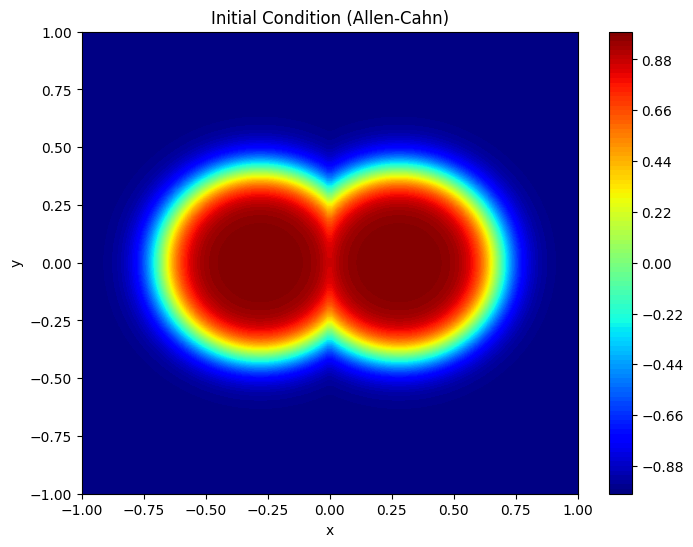

Compiling model...
'compile' took 0.003391 s

Training model...



/opt/conda/lib/python3.10/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(
I0000 00:00:1732637009.375159      34 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                                                                Test loss                                                                 Test metric
0         [1.81e-02, 5.93e+00, 2.96e-01, 1.88e-02, 9.95e-05, 3.95e-04, 1.26e+03]    [1.59e-02, 5.34e+00, 2.96e-01, 1.88e-02, 9.95e-05, 3.95e-04, 1.26e+03]    []  


W0000 00:00:1732637016.410685      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1000      [1.30e+00, 5.51e+00, 2.58e+00, 8.56e+00, 9.79e-02, 2.78e-01, 3.30e+02]    [1.45e+00, 6.17e+00, 2.58e+00, 8.56e+00, 9.79e-02, 2.78e-01, 3.30e+02]    []  

Best model at step 1000:
  train loss: 3.48e+02
  test loss: 3.49e+02
  test metric: []

'train' took 100.769458 s

Iteration: 0, Epsilon Value: 4.362623691558838
Compiling model...
'compile' took 0.008750 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
1000      [1.30e+00, 5.51e+00, 2.58e+00, 8.56e+00, 9.79e-02, 2.78e-01, 3.30e+02]    [1.45e+00, 6.17e+00, 2.58e+00, 8.56e+00, 9.79e-02, 2.78e-01, 3.30e+02]    []  


W0000 00:00:1732637111.433332      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2000      [1.44e+00, 5.20e+00, 1.66e+00, 1.40e+01, 2.39e+00, 2.81e+00, 1.97e+02]    [8.49e-01, 3.41e+00, 1.66e+00, 1.40e+01, 2.39e+00, 2.81e+00, 1.97e+02]    []  

Best model at step 2000:
  train loss: 2.25e+02
  test loss: 2.22e+02
  test metric: []

'train' took 95.019801 s

Iteration: 1000, Epsilon Value: 3.6255300045013428
Compiling model...
'compile' took 0.008168 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
2000      [1.44e+00, 5.20e+00, 1.66e+00, 1.40e+01, 2.39e+00, 2.81e+00, 1.97e+02]    [8.49e-01, 3.41e+00, 1.66e+00, 1.40e+01, 2.39e+00, 2.81e+00, 1.97e+02]    []  


W0000 00:00:1732637206.433333      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


3000      [8.05e+00, 7.15e+00, 5.44e-01, 9.56e+00, 1.18e+00, 8.26e-01, 2.36e+02]    [4.40e+00, 3.21e+00, 5.44e-01, 9.56e+00, 1.18e+00, 8.26e-01, 2.36e+02]    []  

Best model at step 2000:
  train loss: 2.25e+02
  test loss: 2.22e+02
  test metric: []

'train' took 94.919576 s

Iteration: 2000, Epsilon Value: 2.924642324447632
Compiling model...
'compile' took 0.006056 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
3000      [8.05e+00, 7.15e+00, 5.44e-01, 9.56e+00, 1.18e+00, 8.26e-01, 2.36e+02]    [4.40e+00, 3.21e+00, 5.44e-01, 9.56e+00, 1.18e+00, 8.26e-01, 2.36e+02]    []  


W0000 00:00:1732637301.332007      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


4000      [9.29e-01, 5.46e+00, 8.24e-01, 1.06e+01, 2.20e+00, 1.17e+00, 1.71e+02]    [8.26e-01, 4.98e+00, 8.24e-01, 1.06e+01, 2.20e+00, 1.17e+00, 1.71e+02]    []  

Best model at step 4000:
  train loss: 1.92e+02
  test loss: 1.92e+02
  test metric: []

'train' took 94.905379 s

Iteration: 3000, Epsilon Value: 2.872786283493042
Compiling model...
'compile' took 0.006213 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
4000      [9.29e-01, 5.46e+00, 8.24e-01, 1.06e+01, 2.20e+00, 1.17e+00, 1.71e+02]    [8.26e-01, 4.98e+00, 8.24e-01, 1.06e+01, 2.20e+00, 1.17e+00, 1.71e+02]    []  


W0000 00:00:1732637396.271666      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


5000      [1.18e+00, 4.84e+00, 8.20e-01, 7.46e+00, 1.90e+00, 9.09e-01, 1.58e+02]    [9.29e-01, 4.89e+00, 8.20e-01, 7.46e+00, 1.90e+00, 9.09e-01, 1.58e+02]    []  

Best model at step 5000:
  train loss: 1.76e+02
  test loss: 1.75e+02
  test metric: []

'train' took 94.944952 s

Iteration: 4000, Epsilon Value: 2.7071328163146973
Compiling model...
'compile' took 0.007241 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
5000      [1.18e+00, 4.84e+00, 8.20e-01, 7.46e+00, 1.90e+00, 9.09e-01, 1.58e+02]    [9.29e-01, 4.89e+00, 8.20e-01, 7.46e+00, 1.90e+00, 9.09e-01, 1.58e+02]    []  


W0000 00:00:1732637491.495524      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


6000      [3.81e+00, 5.15e+00, 7.25e-01, 7.33e+00, 2.55e+00, 1.56e+00, 1.48e+02]    [1.75e+00, 3.60e+00, 7.25e-01, 7.33e+00, 2.55e+00, 1.56e+00, 1.48e+02]    []  

Best model at step 6000:
  train loss: 1.69e+02
  test loss: 1.65e+02
  test metric: []

'train' took 95.196455 s

Iteration: 5000, Epsilon Value: 2.2086844444274902
Compiling model...
'compile' took 0.006628 s

Training model...

Step      Train loss                                                                Test loss                                                                 Test metric
6000      [3.81e+00, 5.15e+00, 7.25e-01, 7.33e+00, 2.55e+00, 1.56e+00, 1.48e+02]    [1.75e+00, 3.60e+00, 7.25e-01, 7.33e+00, 2.55e+00, 1.56e+00, 1.48e+02]    []  


W0000 00:00:1732637586.470141      34 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:

geom = dde.geometry.Rectangle([Start_Width, Start_Length], [WIDTH, LENGTH])  # Geometry domain

time_domain = dde.geometry.TimeDomain(T_Start, T_End)
geomtime = dde.geometry.GeometryXTime(geom, time_domain)

# Cahn Hilliard PDE
epsilon = tf.Variable(5.0, dtype=tf.float32, trainable= True) # true val = 0.05
def cahn_hilliard_Wight(x, y):
    
    u, mu = y[:, 0:1], y[:, 1:2]
    
    du_t = dde.grad.jacobian(y, x, i=0, j=2) # h_t
    du_xx = dde.grad.hessian(y, x, component=0, i=0, j=0)
    du_yy = dde.grad.hessian(y, x, component=0, i=1, j=1)
    
    dmu_xx = dde.grad.hessian(y, x, component=1, i=0, j=0)
    dmu_yy = dde.grad.hessian(y, x, component=1, i=1, j=1)
    
    f_h = u**3 - u
    
    eq1 = du_t - (dmu_xx + dmu_yy)
    eq2 = mu - (f_h - epsilon**2 * (du_xx + du_yy))
    
    return [eq1, eq2]

# Define the initial condition function using NumPy (for visualization)
r = 0.4
def initial_condition_CA_wight_np(X):
    x_coord = X[:, 0:1]
    y_coord = X[:, 1:2]
    R1 = np.sqrt((x_coord - 0.7 * r) ** 2 + y_coord ** 2)
    R2 = np.sqrt((x_coord + 0.7 * r) ** 2 + y_coord ** 2)
    phi_R1 = np.tanh((r - R1) / (2 * 0.05))
    phi_R2 = np.tanh((r - R2) / (2 * 0.05))
    return np.maximum(phi_R1, phi_R2)

# Boundary Conditions
def on_boundary_x(X, on_boundary):
        x, _, _ = X
        return on_boundary and np.isclose(x, Start_Width) or np.isclose(x, WIDTH)  # Check if on the left boundary
def on_boundary_y(X, on_boundary):
        _, y, _ = X
        return on_boundary and np.isclose(y, Start_Length) or np.isclose(y, LENGTH)  # Check if on the left boundary
    
class SimpleLossTrackingCallback(Callback):
    def __init__(self, every_n_epochs=1000, file_path="/kaggle/working/losses_simple.txt"):
        super(SimpleLossTrackingCallback, self).__init__()
        self.every_n_epochs = every_n_epochs
        self.file_path = file_path
        
        # Ensure the directory exists
        os.makedirs(os.path.dirname(self.file_path), exist_ok=True)
        
        # Check if file exists and is not empty, if so, skip writing the header
        if not os.path.exists(self.file_path) or os.stat(self.file_path).st_size == 0:
            with open(self.file_path, "w") as f:
                f.write("Epoch,PDE Loss,bc_h_x Loss,bc_h_y Loss,bc_h_deriv_x Loss,bc_h_deriv_y Loss,IC Loss,Observe Loss\n")

    def on_epoch_end(self):
        if self.model.train_state.step % self.every_n_epochs == 0 or self.model.train_state.step == 1:
            current_losses = self.model.train_state.loss_train
            loss_str = ",".join(map(str, current_losses))
            with open(self.file_path, "a") as f:
                f.write(f"{self.model.train_state.step},{loss_str}\n")

# Generate a grid of points (X, Y) for visualization
x_vals = np.linspace(Start_Width, WIDTH, 100)
y_vals = np.linspace(Start_Length, LENGTH, 100)
X, Y = np.meshgrid(x_vals, y_vals)
XY_grid = np.hstack([X.reshape(-1, 1), Y.reshape(-1, 1)])  # Flatten the grid for function input

# Compute the initial condition on the grid
Z = initial_condition_CA_wight_np(XY_grid).reshape(100, 100)

# Plot the initial condition
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=100, cmap='jet')
plt.colorbar(contour)
plt.title("Initial Condition (Allen-Cahn)")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Allen Cahn BC and ICs and Data
bc_h_x = dde.icbc.PeriodicBC(geomtime, component=0, derivative_order=0, component_x=0, on_boundary=on_boundary_x)
bc_h_y = dde.icbc.PeriodicBC(geomtime, component=0, derivative_order=0, component_x=1, on_boundary=on_boundary_y)

# Periodic Boundary Conditions for the derivative of 'h' in x and y directions
bc_h_deriv_x = dde.icbc.PeriodicBC(geomtime, component=0, derivative_order=1, component_x=0, on_boundary=on_boundary_x)
bc_h_deriv_y = dde.icbc.PeriodicBC(geomtime, component=0, derivative_order=1, component_x=1, on_boundary=on_boundary_y)

# Load the data from the text file - should be in Kaggle as a dataset
initial_data = np.loadtxt("/kaggle/input/0-01epsilon0-1time/time_0.1_epsilon_0.01_ca.txt", delimiter=',')

# Extract x, y coordinates and eta1 values
xy_observ = initial_data[:, 0:2]  # x, y coordinates
eta1_observ = initial_data[:, 2:3]  # eta1 values

# Update the time to 0.25 instead of 0
time_value = 0.10  # Change this to your desired time
xyt_observ = np.hstack((xy_observ, np.full((xy_observ.shape[0], 1), time_value)))

# Define the initial condition using PointSetBC
from deepxde.icbc import PointSetBC
observ_ic_eta1 = PointSetBC(xyt_observ, eta1_observ, component=0)

# Data for AC 2D
data_AC = dde.data.TimePDE(
        geomtime, cahn_hilliard_Wight, [bc_h_x, bc_h_y, bc_h_deriv_x, bc_h_deriv_y,  observ_ic_eta1],
        anchors=xyt_observ,
        num_domain=30000, num_boundary=1600, num_test=50000
    )
    
iterations_list = [0]  # Starting with iteration 0
epsilon_values = [epsilon.value().numpy()]  # Assuming this is how you access the value of your variable

# Network Architecure
net = dde.nn.FNN([3] + [128] * 6 + [2], "tanh", "Glorot normal")
variable = dde.callbacks.VariableValue(epsilon, period=1000) # tracks trainable variable
model = dde.Model(data_AC, net)


total_iterations = 0
while total_iterations < ITERATIONS_ADAM:
                # Calculate the number of iterations for this loop
                iter_this_loop = 1000
                # Update the total iterations

                # Dynamic learning rate
                if total_iterations < 50000:
                    model.compile("adam", lr=1e-3, loss= 'MSE', loss_weights=LOSS_WEIGHTS, external_trainable_variables=[epsilon])
                else:
                     model.compile("adam", lr=1e-4, loss= 'MSE', loss_weights=LOSS_WEIGHTS, external_trainable_variables=[epsilon])
                      

                losshistory, train_state = model.train(epochs=iter_this_loop, display_every=1000)
                # Update gamma value and error after training
                current_epsilon_value = epsilon.value().numpy()
                print(f"Iteration: {total_iterations}, Epsilon Value: {current_epsilon_value}")

                
                # Update gamma value and error after training
                epsilon_values.append(current_epsilon_value)
                iterations_list.append(total_iterations + iter_this_loop)

                total_iterations += iter_this_loop

if use_lbfgs:
    model.compile("L-BFGS", loss = 'MSE', loss_weights = LOSS_WEIGHTS, external_trainable_variables=[epsilon])
    losshistory, train_state = model.train(epochs=ITERATIONS_LBFGS, display_every=1000, callbacks=[detailed_loss_tracker, variable])


## Graphing

In [ ]:

plt.figure(figsize=(10, 6))
plt.yscale('log')  # Use logarithmic scale if desired

plt.plot(iterations_list, epsilon_values, '-o', label='Iteration vs Epsilon Values', color='blue')

y_ticks = [10**i for i in range(-2, 2)]
plt.yticks(y_ticks, [f"$10^{{{i}}}$" for i in range(-2, 2)], fontsize=12)

plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Epsilon Value', fontsize=14)
plt.title('Iterations vs. Epsilon Value', fontsize=16)
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

# Load the losses from the file
file_path = "/kaggle/working/losses_simple.txt"
losses_df = pd.read_csv(file_path)

# Calculate the total loss as the sum of component-wise losses for each iteration
# Assuming that the first column is 'Epoch' and the rest are loss components
loss_components = losses_df.columns[1:]  # Exclude 'Epoch'
losses_df['Total Loss'] = losses_df[loss_components].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Plot component-wise losses
for component in loss_components:
    plt.plot(losses_df['Epoch'], losses_df[component], label=component)

# Plot total loss

plt.plot(losses_df['Epoch'], losses_df['Total Loss'], label='Total Loss', color='black', linewidth=2, linestyle='--')

plt.xlabel('Iteration', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Loss Components and Total Loss over Iterations', fontsize=16)
plt.legend()
plt.grid(True)

plt.show()